In [1]:
import Diagrams.Backend.Cairo.CmdLine

In [4]:
{-# LANGUAGE NoMonomorphismRestriction FlexibleContexts TypeFamilies #-}
import Diagrams.Prelude

In the original version from Brent, fractals are placed in a triangular fashion
and use recursion :



In [ ]:
-- sierpinski 1 = triangle 1
-- sierpinski n =     s
--                  ===
--               (s ||| s) # centerX
--   where s = sierpinski (n-1)


Another version allow to change color at each level :



In [5]:
import Diagrams.Prelude
import Data.Colour.Palette.BrewerSet

clrs :: [Colour Double]
clrs = brewerSet Purples 9

sierpinski :: Int -> [Colour Double] -> Diagram B
sierpinski n c = go n <> triangle (2^n) # fc (clrs !! 0) # lw none
  where
    clrs = if null c then repeat black else cycle c
    go n
      | n == 1    = t1 # fc (clrs !! 1)
      | otherwise = appends tri (zip vecs (replicate 3 sierp))
      where
        tri   = scale (2 ^ (n-1)) $ t1 # fc (clrs !! (n+1))
        vecs  = [unitY, (rotateBy (-1/12) unitX), (rotateBy (1/12) unit_X)]
        sierp = go (n-1)
        t1    = triangle 1 # reflectY

example =  sierpinski 7 clrs # lw none # center # frame 2

Line 8: Use head
Found:
clrs !! 0
Why not:
head clrsLine 16: Redundant bracket
Found:
[unitY, (rotateBy (- 1 / 12) unitX), (rotateBy (1 / 12) unit_X)]
Why not:
[unitY, rotateBy (- 1 / 12) unitX, (rotateBy (1 / 12) unit_X)]Line 16: Redundant bracket
Found:
[unitY, (rotateBy (- 1 / 12) unitX), (rotateBy (1 / 12) unit_X)]
Why not:
[unitY, (rotateBy (- 1 / 12) unitX), rotateBy (1 / 12) unit_X]

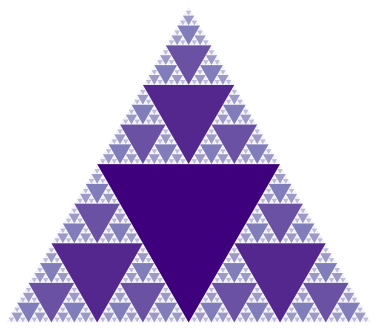

In [6]:
diagram example